In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [27]:
IMAGE_SIZE =256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVill",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
68*32

2176

In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 0 1 0 1 1 0 1 1 1 2 1 1 2 1 1 0 2 0 1 0 0 0 1 0 0 1 0 1 0]


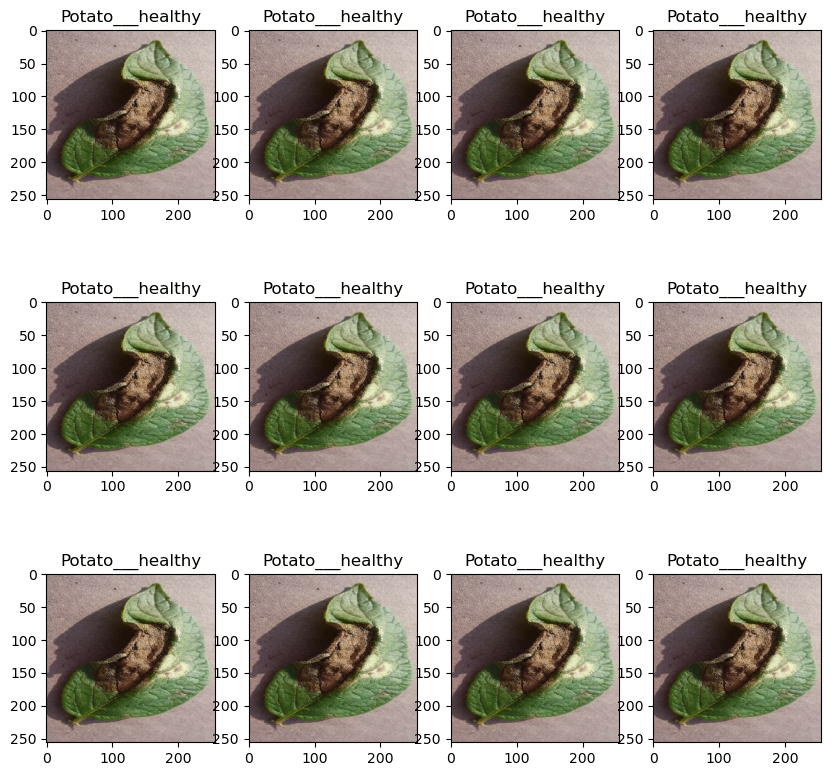

In [26]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
       ax=plt.subplot(3,4,i+1)
       plt.imshow(image_batch[0].numpy().astype("uint8"))
       plt.title(class_names[label_batch[1]])

In [32]:
#80% ==> training
#20% ==> 10% validation, 10% test

In [34]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [35]:
train_ds=dataset.take(54)
len(train_ds)

54

In [37]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [39]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [40]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [42]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [50]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)

    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [51]:
 train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [52]:
len(train_ds)

54

In [53]:
len(val_ds)

6

In [54]:
len(test_ds)

8

In [55]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [58]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [59]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_verticle"),
    layers.RandomRotation(0.2)
])

In [67]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [68]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [70]:
history= model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 820ms/step - accuracy: 0.4567 - loss: 0.9290 - val_accuracy: 0.4693 - val_loss: 0.8954
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 874ms/step - accuracy: 0.5199 - loss: 0.8658 - val_accuracy: 0.7309 - val_loss: 0.5834
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 903ms/step - accuracy: 0.7102 - loss: 0.6588 - val_accuracy: 0.6215 - val_loss: 0.8915
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 937ms/step - accuracy: 0.7584 - loss: 0.5733 - val_accuracy: 0.8414 - val_loss: 0.3578
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 908ms/step - accuracy: 0.8367 - loss: 0.3923 - val_accuracy: 0.8623 - val_loss: 0.3087
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 927ms/step - accuracy: 0.8415 - loss: 0.3600 - val_accuracy: 0.8947 - val_loss: 0.2475
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 942ms/step - accuracy: 0.8878 - loss: 0.2965 - val_accuracy: 0.9190 - val_loss: 0.2250
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 948ms/step - accuracy: 0.9328 - loss: 0.1752 - val_accu

In [73]:
scores=model.evaluate(test_ds)

54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 212ms/step - accuracy: 0.9774 - loss: 0.0851


In [74]:
scores

[0.07423409819602966, 0.9791666865348816]

In [75]:
history

In [76]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [77]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [78]:
history.history['accuracy']

[0.4739583432674408,
 0.5908564925193787,
 0.7228009104728699,
 0.7870370149612427,
 0.8344907164573669,
 0.8535879850387573,
 0.8929398059844971,
 0.9120370149612427,
 0.9241898059844971,
 0.9311342835426331,
 0.9618055820465088,
 0.9525462985038757,
 0.9699074029922485,
 0.9780092835426331,
 0.9791666865348816,
 0.9704861044883728,
 0.9733796119689941,
 0.9756944179534912,
 0.9861111044883728,
 0.9716435074806213,
 0.9901620149612427,
 0.9803240895271301,
 0.9878472089767456,
 0.9907407164573669,
 0.9924768805503845,
 0.9849537014961243,
 0.9762731194496155,
 0.9849537014961243,
 0.9942129850387573,
 0.9901620149612427,
 0.9890046119689941,
 0.9942129850387573,
 0.9942129850387573,
 0.9918981194496155,
 0.9936342835426331,
 0.9965277910232544,
 0.9918981194496155,
 0.9901620149612427,
 0.9976851940155029,
 0.9913194179534912,
 0.9924768805503845,
 0.9878472089767456,
 0.9959490895271301,
 0.9965277910232544,
 0.9953703880310059,
 0.9924768805503845,
 0.9936342835426331,
 0.9866898059

In [80]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation accuracy')

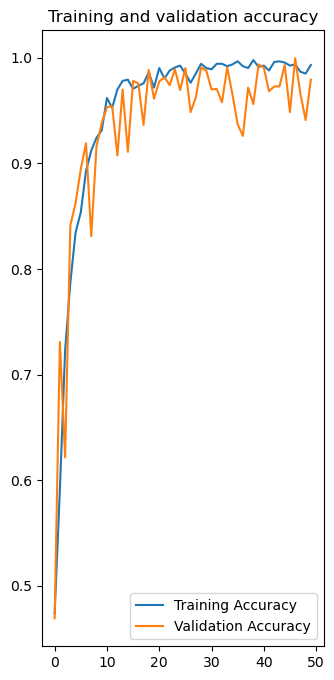

In [81]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
predicted label: Potato___Late_blight


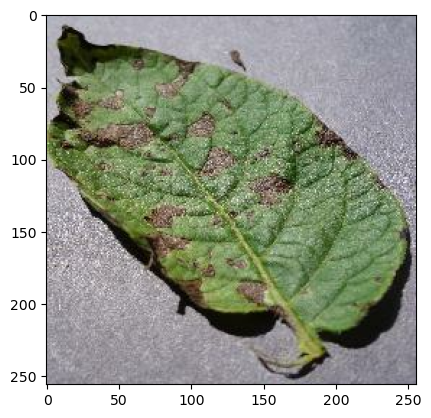

In [83]:
import numpy as np
for images_batch,label_batch in test_ds.take(1):

    first_image=images_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction=model.predict(image_batch)
    print('predicted label:', class_names[np.argmax(batch_prediction[0])])

In [96]:
from tensorflow.keras.preprocessing.image import img_to_array

def predict(model,img):
    #img_array=tf.keras.preprossing.image,img_to_array(images[i].numpy())
    img_array = img_to_array(img)

    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100* (np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


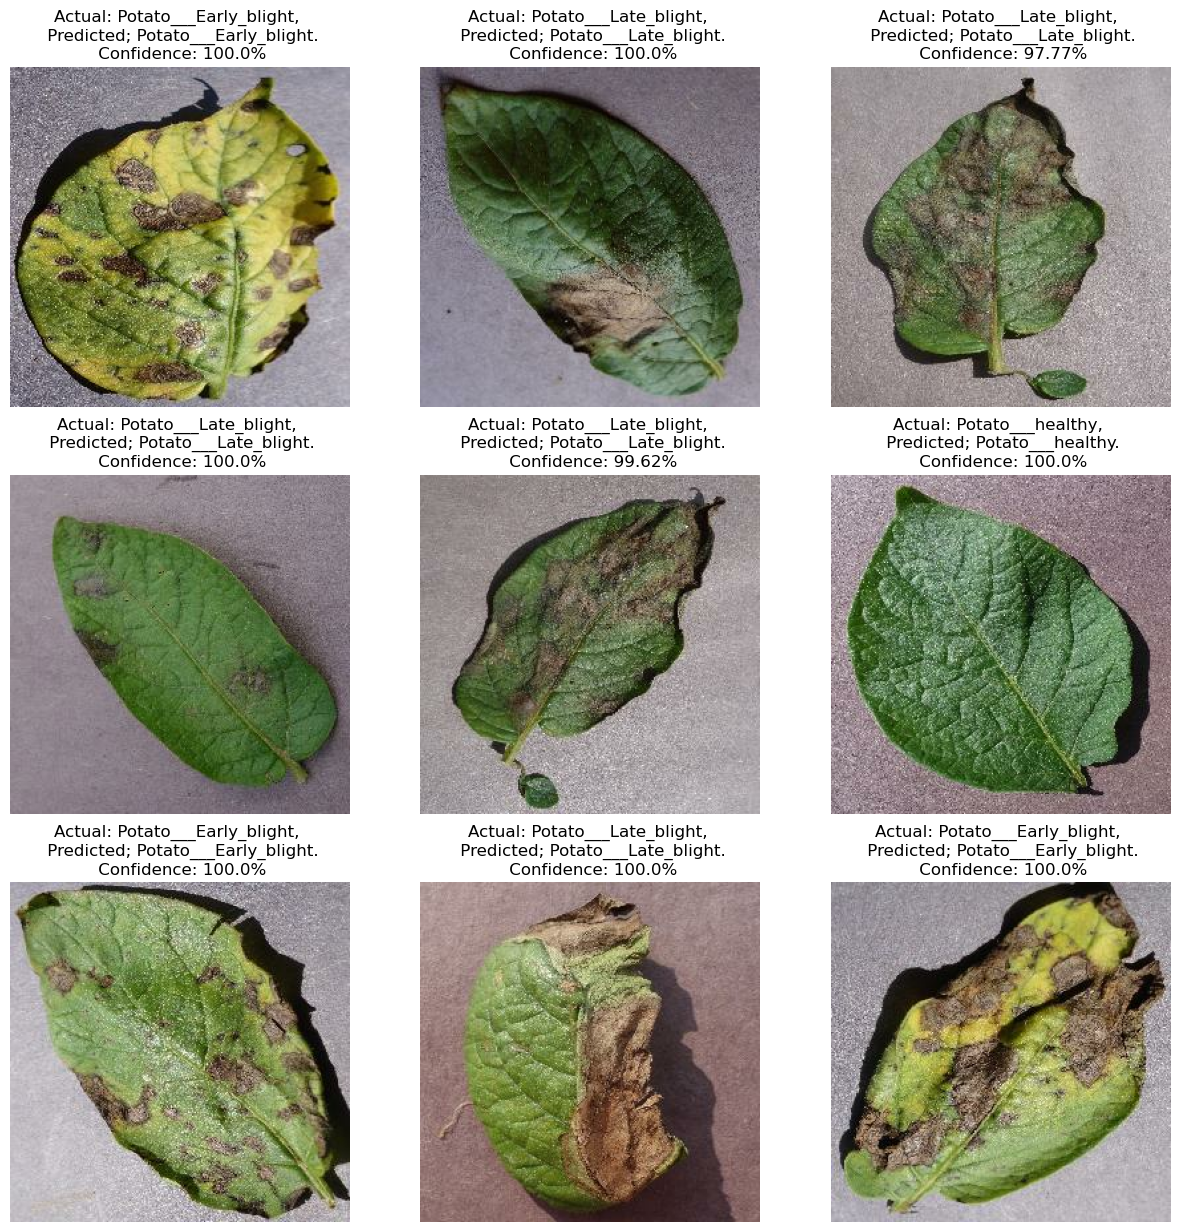

In [97]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted; {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [111]:
#import os
#model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
#model.save(f"../models/{model_version}.keras")

In [108]:
#model_version=1
#model.save(f"../models/{model_version}.keras")

In [110]:
import os

# Extract numbers before the extension, filter only valid integers
model_dirs = [int(f.split('.')[0]) for f in os.listdir("../models") if f.split('.')[0].isdigit()]
model_version = max(model_dirs + [0]) + 1

model.save(f"../models/{model_version}.keras")
